In [1]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [2]:
similarity = model.similarity('king', 'queen')
print(f"Similarity between 'king' and 'queen': {similarity:.4f}")

Similarity between 'king' and 'queen': 0.6511


In [3]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print(f"man:woman::king:{result[0][0]}")

man:woman::king:queen


In [5]:
synonyms = model.most_similar('computer', topn=5)
for word, score in synonyms:
  print(f"{word}: {score:.4f}")


computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082


In [6]:
odd_word = model.doesnt_match(['apple', 'banana', 'cherry', 'computer'])
print(f"The odd one out is: {odd_word}")

The odd one out is: computer


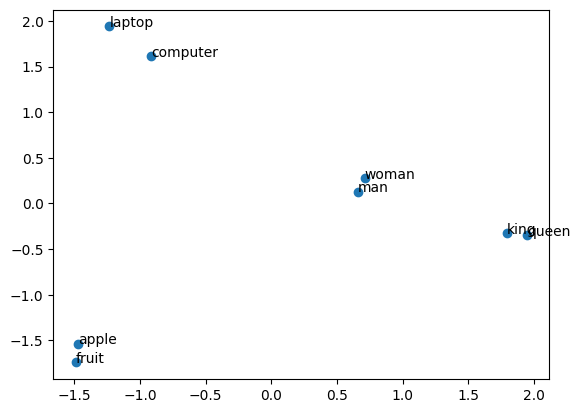

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
words = ['king', 'queen', 'man', 'woman', 'computer', 'laptop', 'fruit',
'apple']
vectors = [model[word] for word in words]
# Reduce dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
# Plotting
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
